In [1]:
import numpy as np

def inspect_image(img, name="Image"):
    print(f"=== {name} ===")
    print("Shape:", img.shape)
    print("Dtype:", img.dtype)
    print("Min:", np.min(img))
    print("Max:", np.max(img))
    print("Mean:", np.mean(img))
    print("Std:", np.std(img))


In [4]:
import os
print(os.path.exists(r'D:\Kaggle\Quang Phổ Lúa mì\Data\train\MS\Health_hyper_1.tif'))

True


In [7]:
import tifffile as tiff

img = tiff.imread(r'D:\Kaggle\Quang Phổ Lúa mì\Data\train\MS\Health_hyper_1.tif')

inspect_image(img)


=== Image ===
Shape: (64, 64, 5)
Dtype: uint16
Min: 272
Max: 4936
Mean: 1889.192236328125
Std: 1070.5319614457267


In [11]:
def inspect_channels(img, channel_names=None):
    H, W, C = img.shape
    for i in range(C):
        ch = img[:, :, i]
        if channel_names and i < len(channel_names):
            name = channel_names[i]
        else:
            name = f"Band {i}"
        print(f"\n{name}")
        print("  Min:", ch.min())
        print("  Max:", ch.max())
        print("  Mean:", ch.mean())

bands = ["Blue", "Green", "Red", "NIR"]
inspect_channels(img, bands)



Blue
  Min: 272
  Max: 1174
  Mean: 732.83642578125

Green
  Min: 542
  Max: 1740
  Mean: 1178.8994140625

Red
  Min: 480
  Max: 2194
  Mean: 1389.148193359375

NIR
  Min: 1790
  Max: 3898
  Mean: 2783.15185546875

Band 4
  Min: 2245
  Max: 4936
  Mean: 3361.92529296875


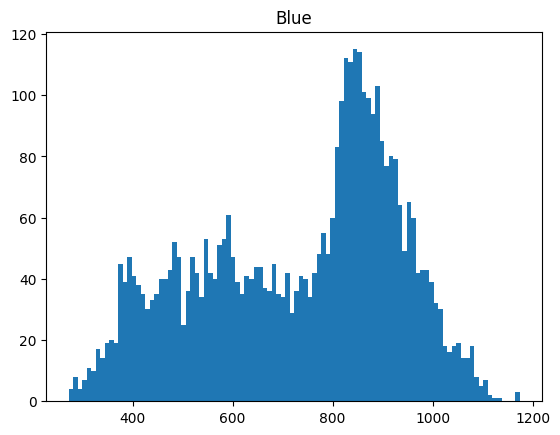

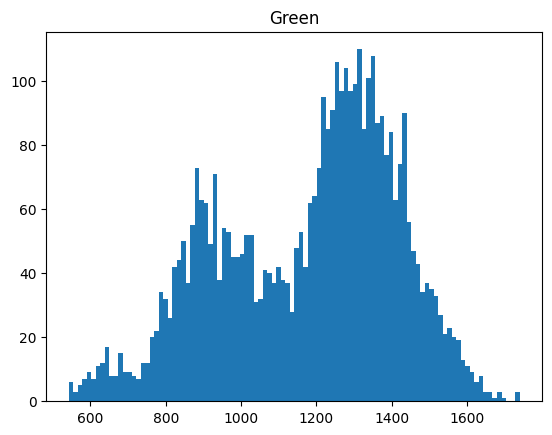

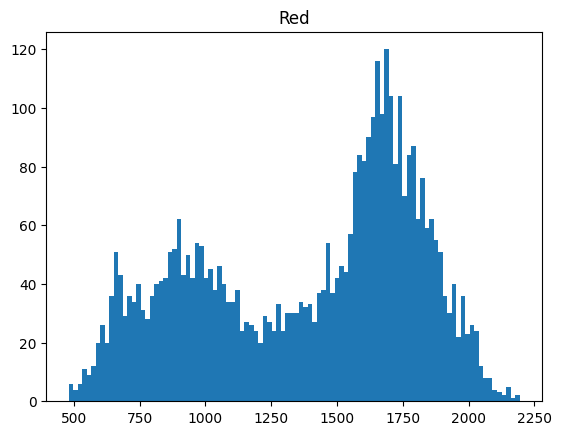

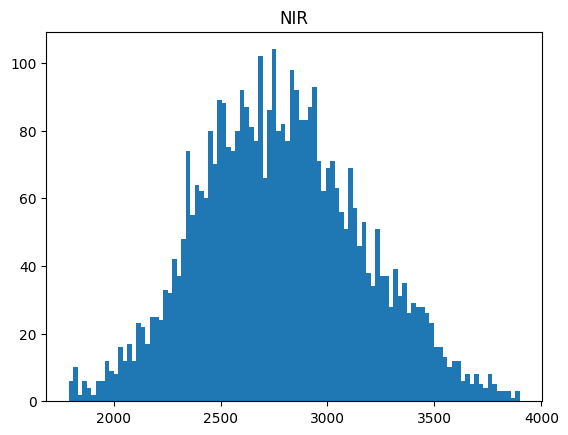

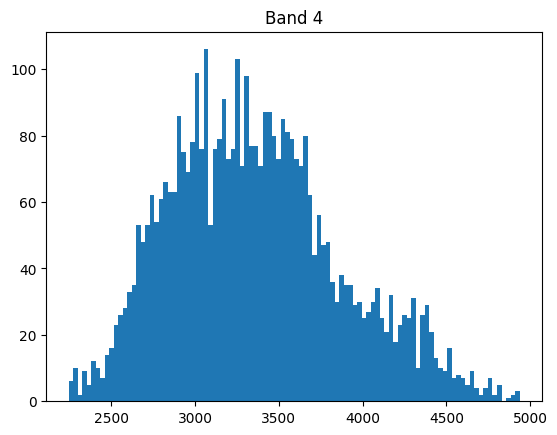

In [14]:
import matplotlib.pyplot as plt

def plot_hist_channels(img, channel_names=None, max_channels=10):
    C = img.shape[2]
    for i in range(min(C, max_channels)):
        plt.figure()
        plt.hist(img[:, :, i].ravel(), bins=100)
        
        if channel_names and i < len(channel_names):
            title = channel_names[i]
        else:
            title = f"Band {i}"
            
        plt.title(title)
        plt.show()

plot_hist_channels(img, bands)


NDVI stats:
  Min: 0.16101904522359164
  Max: 0.693323550820904
  Mean: 0.3441003119676488


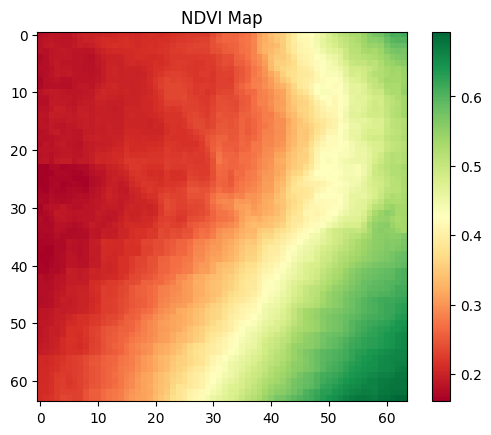

In [16]:
def inspect_ndvi(ndvi):
    print("NDVI stats:")
    print("  Min:", ndvi.min())
    print("  Max:", ndvi.max())
    print("  Mean:", ndvi.mean())
    
    import matplotlib.pyplot as plt
    plt.imshow(ndvi, cmap="RdYlGn")
    plt.colorbar()
    plt.title("NDVI Map")
    plt.show()
red = img[:, :, 2]
nir = img[:, :, 3]
ndvi = (nir - red) / (nir + red + 1e-6)
inspect_ndvi(ndvi)

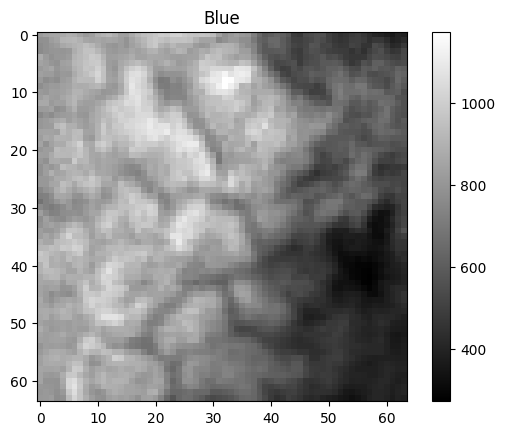

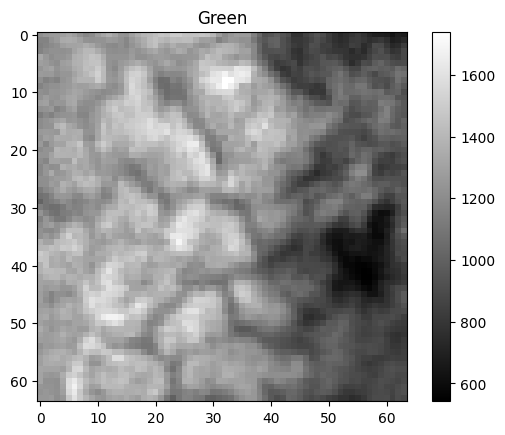

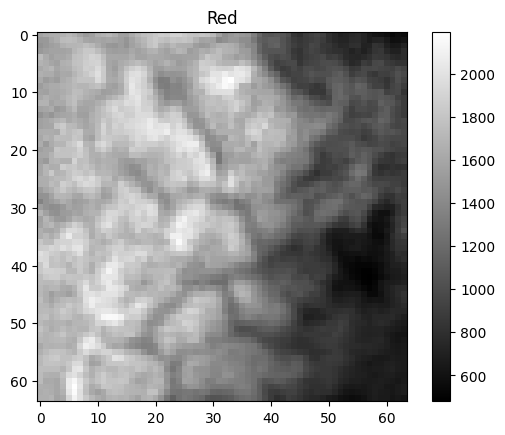

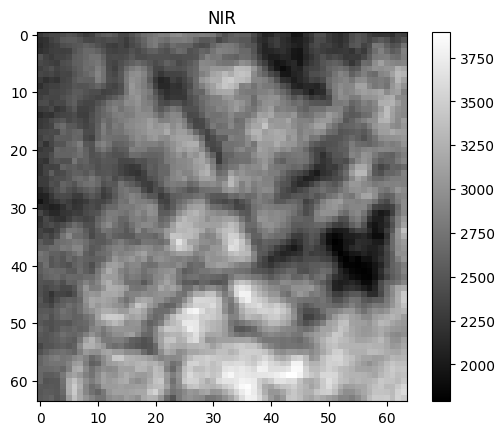

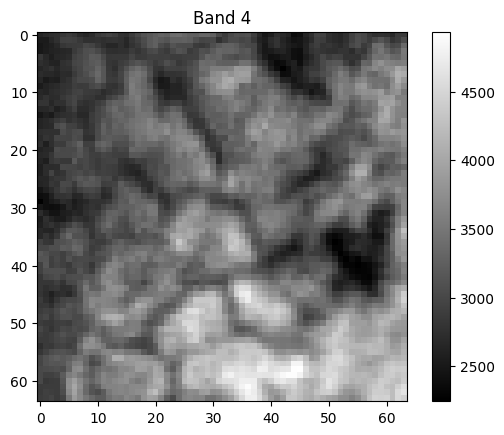

In [18]:
def show_channels(img, channel_names=None):
    import matplotlib.pyplot as plt
    C = img.shape[2]
    for i in range(C):
        plt.figure()
        plt.imshow(img[:, :, i], cmap="gray")
        if channel_names and i < len(channel_names):
            title = channel_names[i]
        else:
            title = f"Band {i}"
       
        plt.title(title)
        plt.colorbar()
        plt.show()
show_channels(img, bands)
